In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas.plotting import scatter_matrix

In [2]:
train = pd.read_csv('f_hp1.csv')

In [3]:
train.head()

,facility_id,recommend,ans_percent,rating,ed_score,sep_score,op_score,op18_score,label
0,271331,H_RECMND_DY,46,3,83.0,125.0,22.0,80.0,0
1,450346,H_RECMND_DN,3,2,72.0,125.0,5.0,80.0,1
2,390073,H_RECMND_DY,55,3,72.0,125.0,22.0,174.0,0
3,191326,H_RECMND_DY,31,3,72.0,83.0,22.0,80.0,0
4,390256,H_RECMND_DN,3,4,72.0,125.0,22.0,234.0,1


In [4]:
train.isnull()

,facility_id,recommend,ans_percent,rating,ed_score,sep_score,op_score,op18_score,label
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4707,False,False,False,False,False,False,False,False,False
4708,False,False,False,False,False,False,False,False,False
4709,False,False,False,False,False,False,False,False,False
4710,False,False,False,False,False,False,False,False,False


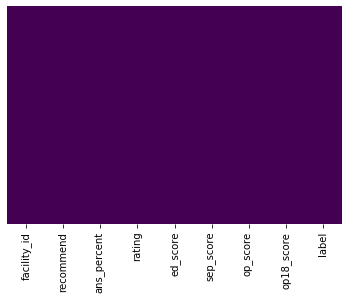

In [5]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

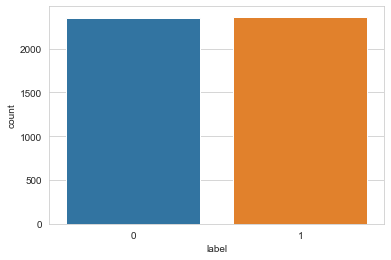

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='label',data=train)

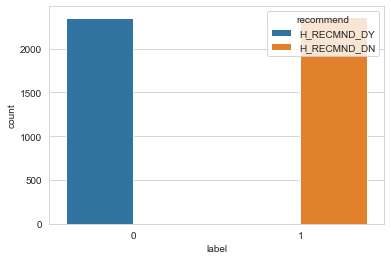

In [81]:
sns.set_style('whitegrid')
sns.countplot(x='label',hue='recommend',data=train) #,palette='RdBu_r'

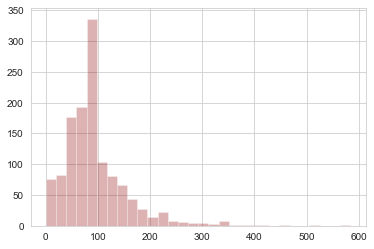

In [82]:
train['ed_score'].hist(bins=30,color='darkred',alpha=0.3)

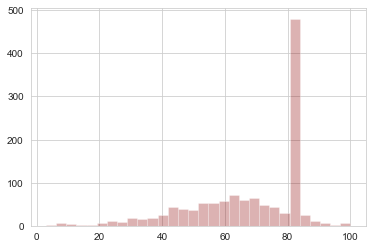

In [83]:
train['sep_score'].hist(bins=30,color='darkred',alpha=0.3)

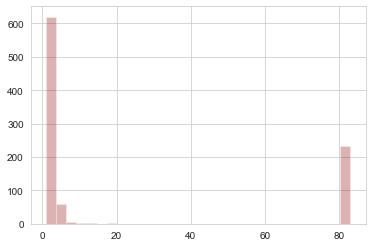

In [84]:
train['op_score'].hist(bins=30,color='darkred',alpha=0.3)

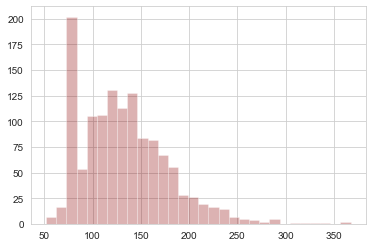

In [85]:
train['op18_score'].hist(bins=30,color='darkred',alpha=0.3)

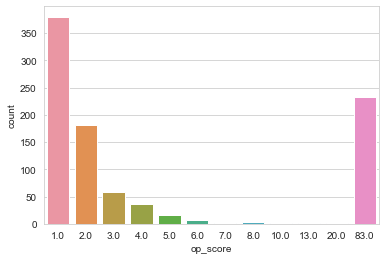

In [86]:
sns.countplot(x='op_score',data=train)

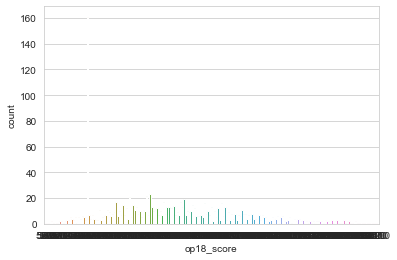

In [87]:
sns.countplot(x='op18_score',data=train)

In [88]:
train['op_score'].median()

2.0

In [89]:
train['op_score'].mean()

22.29641693811075

In [90]:
train['op_score'].mode()

0    1.0
dtype: float64

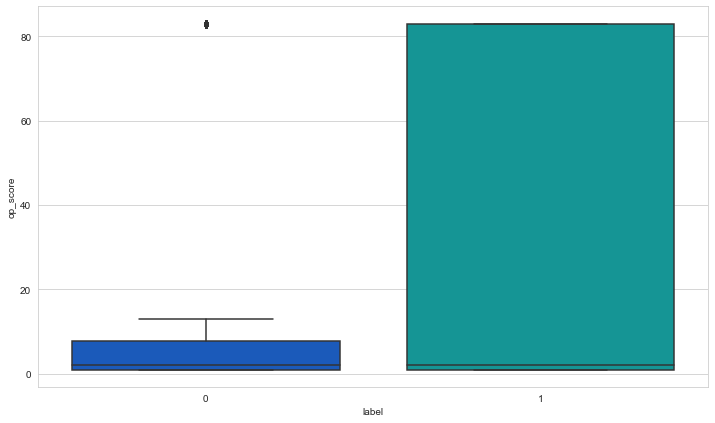

In [91]:
# missing imputation
plt.figure(figsize=(12, 7))
sns.boxplot(x='label',y='op_score',data=train,palette='winter')

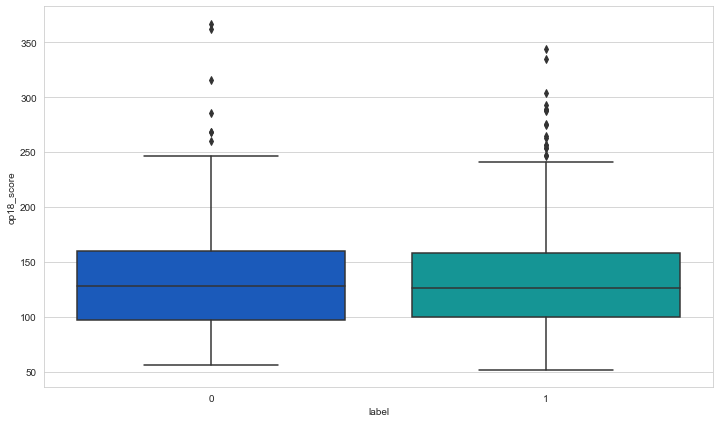

In [92]:
# missing imputation
plt.figure(figsize=(12, 7))
sns.boxplot(x='label',y='op18_score',data=train,palette='winter')

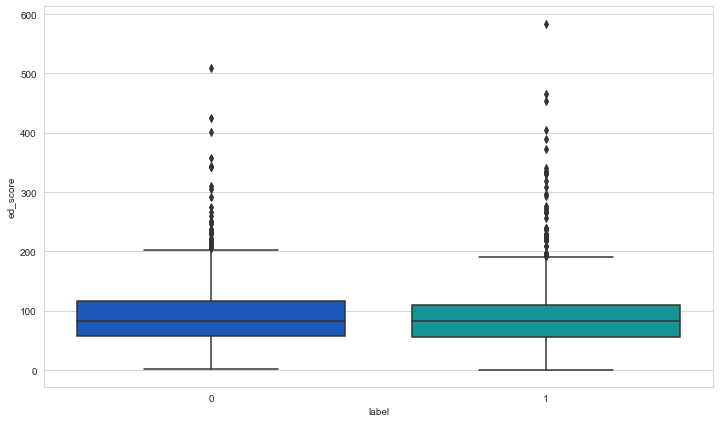

In [93]:
# missing imputation
plt.figure(figsize=(12, 7))
sns.boxplot(x='label',y='ed_score',data=train,palette='winter')

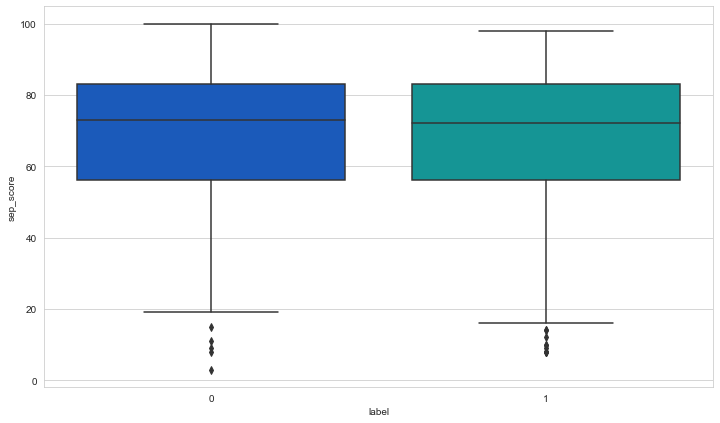

In [94]:
# missing imputation
plt.figure(figsize=(12, 7))
sns.boxplot(x='label',y='sep_score',data=train,palette='winter')

In [95]:
def impute_mis(cols):
    op_score = cols[0]
    label = cols[1]
    
    if pd.isnull(op_score):

        if label == 0:
            return 22

        else:
            return 22

    else:
        return op_score

In [96]:
def impute_mis1(cols):
    ed_score = cols[0]
    label = cols[1]
    
    if pd.isnull(ed_score):

        if label == 0:
            return 80

        else:
            return 80

    else:
        return ed_score

In [97]:
def impute_mis2(cols):
    op18_score = cols[0]
    label = cols[1]
    
    if pd.isnull(op18_score):

        if label == 0:
            return 125

        else:
            return 125

    else:
        return op18_score

In [98]:
def impute_mis3(cols):
    sep_score = cols[0]
    label = cols[1]
    
    if pd.isnull(sep_score):

        if label == 0:
            return 72

        else:
            return 72

    else:
        return sep_score

In [99]:
train['op_score'] = train[['op_score','label']].apply(impute_mis,axis=1)

In [100]:
train['op18_score'] = train[['op18_score','label']].apply(impute_mis1,axis=1)

In [101]:
train['sep_score'] = train[['sep_score','label']].apply(impute_mis2,axis=1)

In [102]:
train['ed_score'] = train[['ed_score','label']].apply(impute_mis3,axis=1)

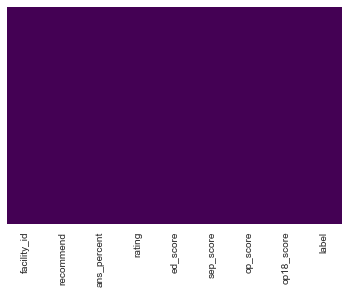

In [103]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [104]:
train.head()

,facility_id,recommend,ans_percent,rating,ed_score,sep_score,op_score,op18_score,label
0,271331,H_RECMND_DY,46,3,83.0,125.0,22.0,80.0,0
1,450346,H_RECMND_DN,3,2,72.0,125.0,5.0,80.0,1
2,390073,H_RECMND_DY,55,3,72.0,125.0,22.0,174.0,0
3,191326,H_RECMND_DY,31,3,72.0,83.0,22.0,80.0,0
4,390256,H_RECMND_DN,3,4,72.0,125.0,22.0,234.0,1


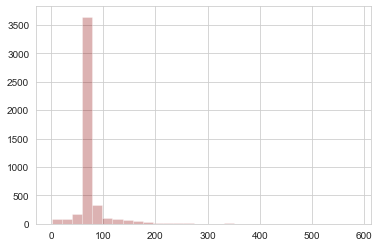

In [105]:
train['ed_score'].hist(bins=30,color='darkred',alpha=0.3);

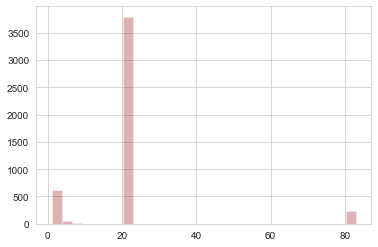

In [106]:
train['op_score'].hist(bins=30,color='darkred',alpha=0.3);


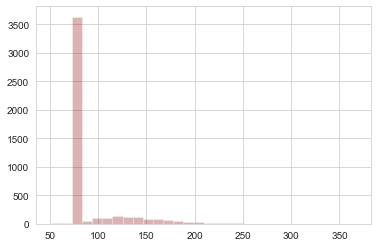

In [107]:
train['op18_score'].hist(bins=30,color='darkred',alpha=0.3);


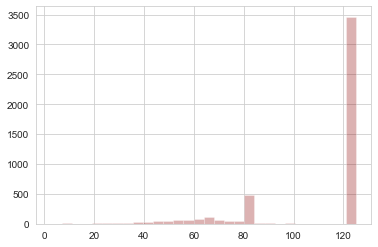

In [108]:
train['sep_score'].hist(bins=30,color='darkred',alpha=0.3);

In [109]:
train.describe()

,facility_id,ans_percent,rating,ed_score,sep_score,op_score,op18_score,label
count,4712.000000,4712.000000,4712.000000,4712.000000,4712.000000,4712.000000,4712.000000,4712.000000
mean,267203.396435,37.442487,3.169567,77.946307,109.848048,22.057937,94.491935,0.501698
std,156620.099969,31.817693,0.947073,34.466752,26.889347,15.585694,33.346695,0.500050
min,10001.000000,0.000000,1.000000,1.000000,3.000000,1.000000,52.000000,0.000000
25%,140170.750000,5.000000,3.000000,72.000000,83.000000,22.000000,80.000000,0.000000
50%,260014.000000,31.000000,3.000000,72.000000,125.000000,22.000000,80.000000,1.000000
75%,390194.250000,70.000000,4.000000,72.000000,125.000000,22.000000,83.000000,1.000000
max,670130.000000,100.000000,5.000000,584.000000,125.000000,83.000000,367.000000,1.000000


In [110]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4712 entries, 0 to 4711
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   facility_id  4712 non-null   int64  
 1   recommend    4712 non-null   object 
 2   ans_percent  4712 non-null   int64  
 3   rating       4712 non-null   int64  
 4   ed_score     4712 non-null   float64
 5   sep_score    4712 non-null   float64
 6   op_score     4712 non-null   float64
 7   op18_score   4712 non-null   float64
 8   label        4712 non-null   int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 331.4+ KB


In [111]:
from pandas.plotting import scatter_matrix

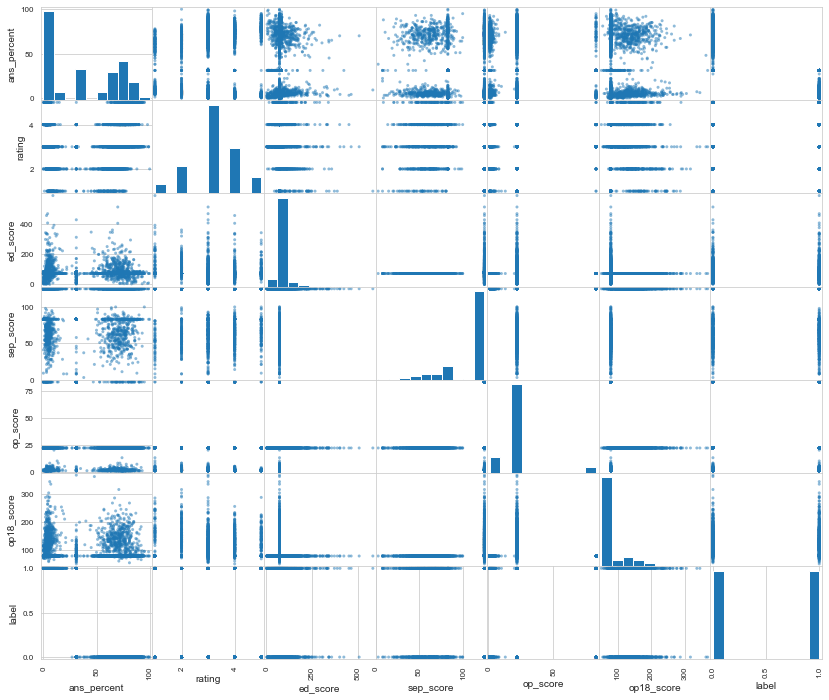

In [121]:
scatter_matrix(train.loc[:,'recommend':'label' ],figsize=(14,12));

In [123]:
train.to_csv('f_hp1.csv',index=False)